In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('Mall_Customers.csv')

In [45]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
enoder = OneHotEncoder(handle_unknown='ignore')

arr = data['Gender'].to_numpy()
enoder.fit(arr.reshape(-1,1))

encoded_col = enoder.get_feature_names_out()

In [48]:
encoded_col

array(['x0_Female', 'x0_Male'], dtype=object)

In [49]:
temp = enoder.transform(arr.reshape(-1,1))

In [50]:
encoded_dataframe = pd.DataFrame.sparse.from_spmatrix(temp , columns=enoder.get_feature_names_out())

In [51]:
data.drop(columns=(['CustomerID' , 'Gender']) , inplace=True)

In [52]:
final_data = pd.concat([data , encoded_dataframe] , axis = 1)

In [53]:
final_data

,Age,Annual Income (k$),Spending Score (1-100),x0_Female,x0_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler  = StandardScaler()

In [58]:
final_data = scaler.fit_transform(final_data)

C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [59]:
final_data = pd.DataFrame(final_data , columns=['Age' , 'Annual Income (k$)' ,'	Spending Score (1-100)' , 'female' ,'male'])

In [60]:
final_data

,Age,Annual Income (k$),\tSpending Score (1-100),female,male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


<Axes: >

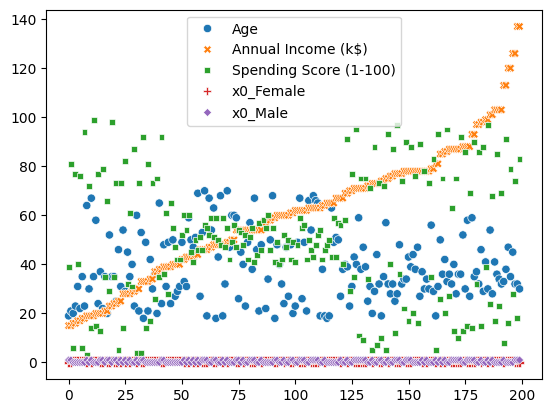

In [54]:
sns.scatterplot(data=final_data)

In [62]:
from sklearn.cluster import KMeans

In [63]:
model = KMeans(n_clusters=4 , random_state=42 , n_init="auto").fit(final_data)

In [73]:
predict = model.predict(final_data)
predict

array([3, 3, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3])

In [82]:
final_data['cluster'] = predict

In [80]:
 final_data[:,0]

InvalidIndexError: (slice(None, None, None), 0)